<a href="https://colab.research.google.com/github/shubhkhandare/Spam_Classification/blob/main/Spam_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

** CREATING TEXT REPRESENTATIONS **

In [134]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [135]:
spam_data =pd.read_csv('Spam-Classification.csv')
print(spam_data.head())


  CLASS                                                SMS
0   ham   said kiss, kiss, i can't do the sound effects...
1   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2  spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3  spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4  spam  **FREE MESSAGE**Thanks for using the Auction S...


seperate features and target data

In [136]:
spam_classes_raw = spam_data["CLASS"]
spam_messages = spam_data["SMS"]

In [137]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer


In [138]:
def customtokenize(str):
  token=nltk.word_tokenize(str)
  nostop = list(filter(lambda token: token not in stopwords.words('english'), token))
  lemmatized=[lemmatizer.lemmatize(words) for words in nostop]
  return lemmatized


In [139]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [140]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [141]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [142]:
vectorizer = TfidfVectorizer(tokenizer=customtokenize)
tfidf = vectorizer.fit_transform(spam_messages)
tfidf_array= tfidf.toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


label encoder

In [143]:
label_encoder= preprocessing.LabelEncoder()
spam_classes = label_encoder.fit_transform(spam_classes_raw)

spam_classes=tf.keras.utils.to_categorical(spam_classes,2)


In [144]:
print("TF-IDF MATRIX SHAPE:", tfidf.shape)
print("one-hot Encoding shape:", spam_classes.shape)

TF-IDF MATRIX SHAPE: (1500, 4566)
one-hot Encoding shape: (1500, 2)


In [145]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_array, spam_classes, test_size=0.10)

** BUILDING AND EVALUATING THE MODEL **

In [146]:
NB_CLASSES =2
N_HIDDEN = 32

model = tf.keras.models.Sequential()

In [147]:
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(x_train.shape[1],),
                             name = 'layer1', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, name = 'layer2', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES, name = 'outlayer', activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 32)                146144    
                                                                 
 layer2 (Dense)              (None, 32)                1056      
                                                                 
 outlayer (Dense)            (None, 2)                 66        
                                                                 
Total params: 147266 (575.26 KB)
Trainable params: 147266 (575.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training

In [149]:
VERBOSE=1
BATCH_SIZE=256
EPOCHS=10
VALIDATION_SPLIT=0

history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/10
6/6 [==============================] - 0s 23ms/step - loss: 0.1947 - accuracy: 0.9874
Epoch 2/10
6/6 [==============================] - 0s 21ms/step - loss: 0.1626 - accuracy: 0.9881
Epoch 3/10
6/6 [==============================] - 0s 19ms/step - loss: 0.1357 - accuracy: 0.9896
Epoch 4/10
6/6 [==============================] - 0s 17ms/step - loss: 0.1126 - accuracy: 0.9919
Epoch 5/10
6/6 [==============================] - 0s 17ms/step - loss: 0.0937 - accuracy: 0.9926
Epoch 6/10
6/6 [==============================] - 0s 19ms/step - loss: 0.0779 - accuracy: 0.9933
Epoch 7/10
6/6 [==============================] - 0s 19ms/step - loss: 0.0646 - accuracy: 0.9963
Epoch 8/10
6/6 [==============================] - 0s 19ms/step - loss: 0.0537 - accuracy: 0.9963
Epoch 9/10
6/6 [==============================] - 0s 18ms/step - loss: 0.0448 - accuracy: 0.9970
Epoch 10/10
6/6 [==============================] - 0s 17ms/step - loss: 0.0372 - accuracy: 0.9985


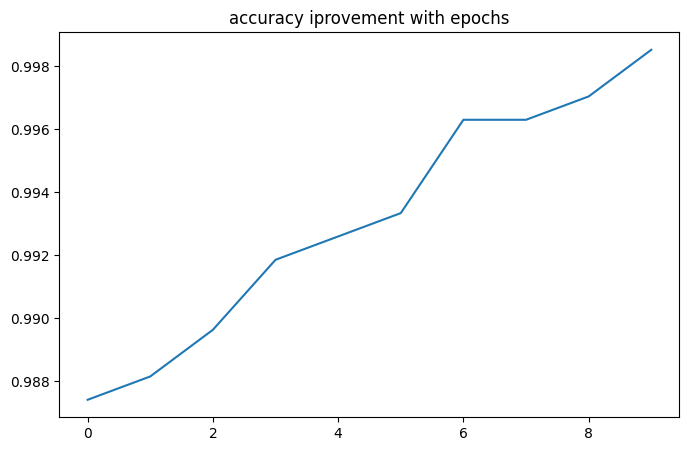

5/5 [==============================] - 0s 7ms/step - loss: 0.0870 - accuracy: 0.9933


[0.08697174489498138, 0.9933333396911621]

In [152]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("accuracy iprovement with epochs")
plt.show()
model.evaluate(x_test, y_test)


Predict

In [154]:
predict_tfidf=vectorizer.transform(["FREE entry to a fun contest", "You I will come over "]).toarray()
print(predict_tfidf.shape)
prediction=np.argmax(model.predict(predict_tfidf), axis=1)
print("prediction output", prediction)

print("prediction classes are", label_encoder.inverse_transform(prediction))

(2, 4566)
1/1 [==============================] - 0s 102ms/step
prediction output [1 0]
prediction classes are ['spam' 'ham']
